# Processed Data Analysis
 
This notebook analyzes the processed climate dataset. It performs error checking, displays summary statistics, and generates visualizations that can be presented in your thesis.
 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed dataset
df = pd.read_csv('../data/processed/climate_data.csv')

print('Data shape:', df.shape)
print('Columns:', df.columns.tolist())
print('Head of dataset:')
print(df.head())

Data shape: (317344, 10)
Columns: ['time', 'time_idx', 'latitude', 'longitude', 'group_id', 't2m', 'tp', 'd2m', 'latitude_numeric', 'longitude_numeric']
Head of dataset:
         time  time_idx  latitude  longitude   group_id       t2m        tp  \
0  2022-01-01         0     55.00      14.00  55.0_14.0 -0.461059  0.367971   
1  2022-01-01         0     50.75      14.00  50.8_14.0  0.013345 -0.517193   
2  2022-01-01         0     50.75      14.25  50.8_14.2  0.029674 -0.562978   
3  2022-01-01         0     50.75      14.50  50.8_14.5  0.055157 -0.555347   
4  2022-01-01         0     50.75      14.75  50.8_14.8  0.025158 -0.161093   

        d2m  latitude_numeric  longitude_numeric  
0  0.118855              55.0               14.0  
1  0.309968              50.8               14.0  
2  0.335609              50.8               14.2  
3  0.383107              50.8               14.5  
4  0.392354              50.8               14.8  


## Data Summary
 

In [3]:
print('Basic Statistics:')
print(df.describe())

print('\nMissing values per column:')
print(df.isnull().sum())

print('\nData types:')
print(df.dtypes)

Basic Statistics:
            time_idx      latitude      longitude           t2m            tp  \
count  317344.000000  317344.00000  317344.000000  3.173440e+05  3.173440e+05   
mean       14.183331      52.01628      18.977556  2.221072e-08 -6.505274e-09   
std         8.463870       1.79528       2.964651  1.000002e+00  1.000002e+00   
min         0.000000      49.00000      14.000000 -3.000837e+00 -6.418284e-01   
25%         7.000000      50.50000      16.500000 -8.298376e-01 -6.418284e-01   
50%        14.000000      52.00000      19.000000  1.478828e-03 -5.222803e-01   
75%        22.000000      53.50000      21.500000  7.741017e-01  2.255308e-01   
max        29.000000      55.00000      24.000000  2.585085e+00  3.611030e+00   

                d2m  latitude_numeric  longitude_numeric  
count  3.173440e+05     317344.000000      317344.000000  
mean   8.320726e-09         52.016252          18.977523  
std    1.000002e+00          1.798968           2.966946  
min   -3.118643e

## Distribution of Key Variable
 

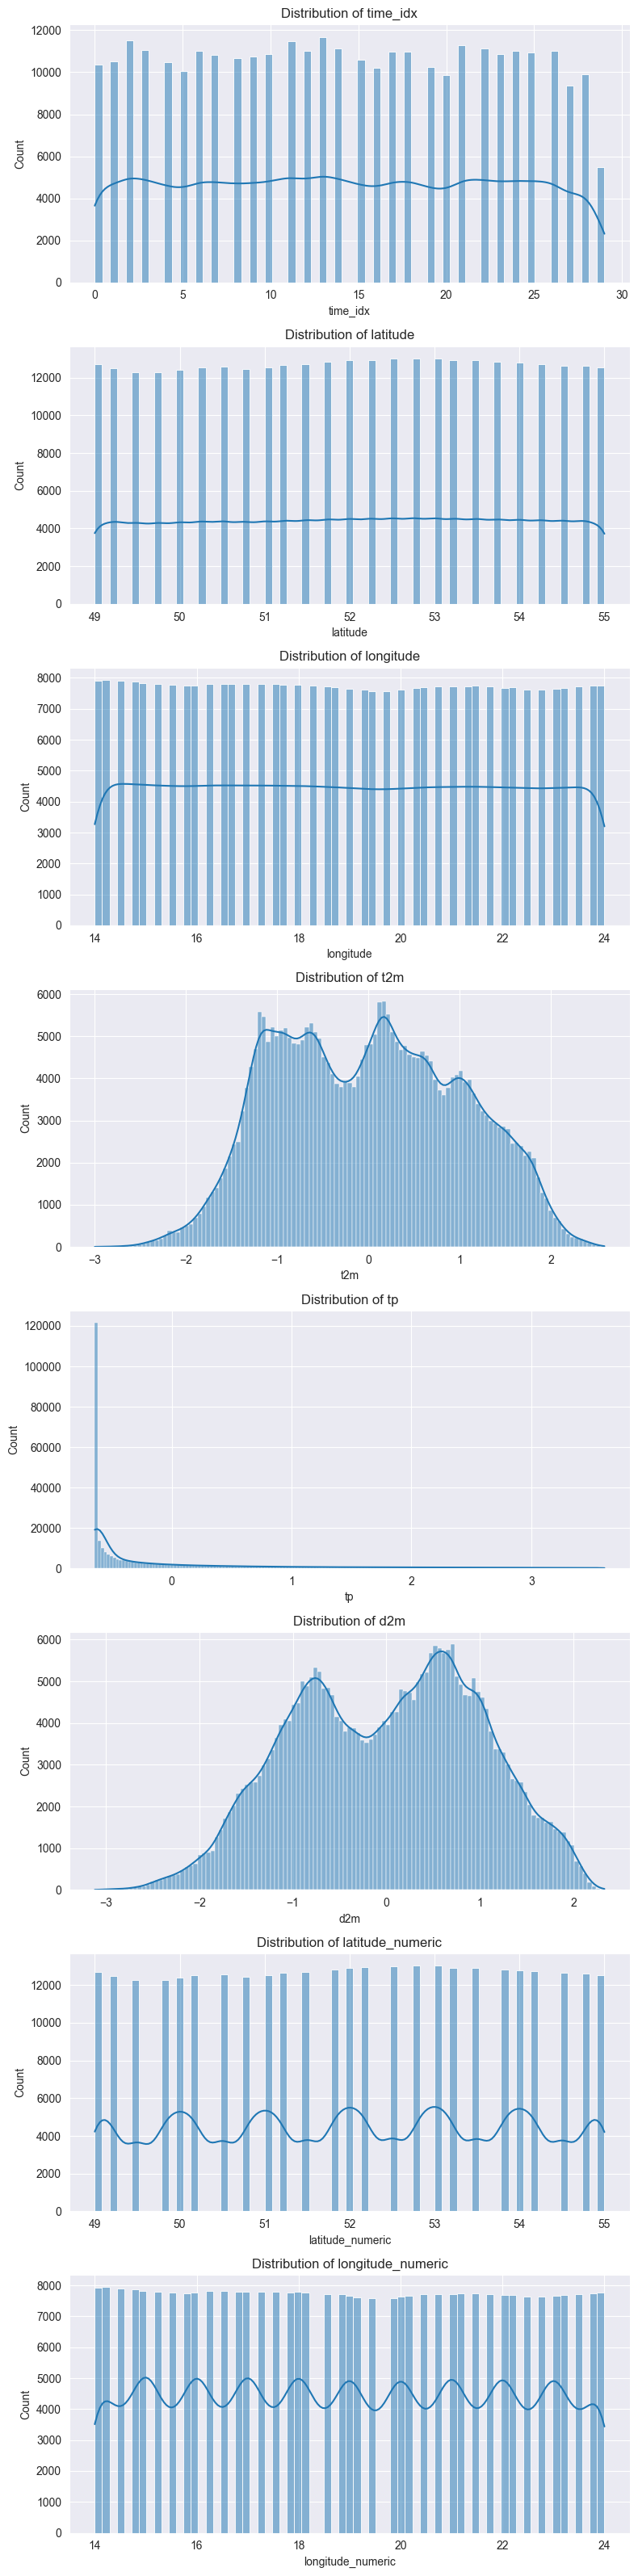

In [4]:
# Plot histograms for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
num_plots = len(numeric_cols)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 4*num_plots))

for ax, col in zip(axes, numeric_cols):
    sns.histplot(df[col].dropna(), ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## Time Series Analysis for Temperature
 

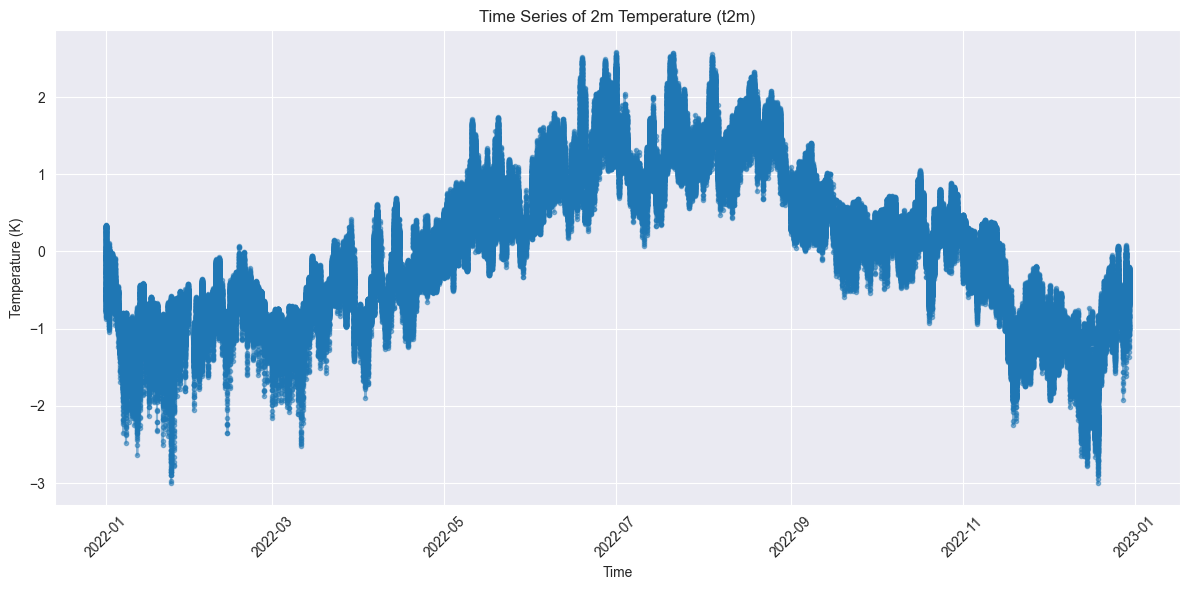

In [5]:
# Ensure the time column is datetime
if not np.issubdtype(df['time'].dtype, np.datetime64):
    df['time'] = pd.to_datetime(df['time'])

# Plot time series of 2m temperature (t2m)
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['t2m'], marker='.', linestyle='-', alpha=0.5)
plt.title('Time Series of 2m Temperature (t2m)')
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation Analysis
 

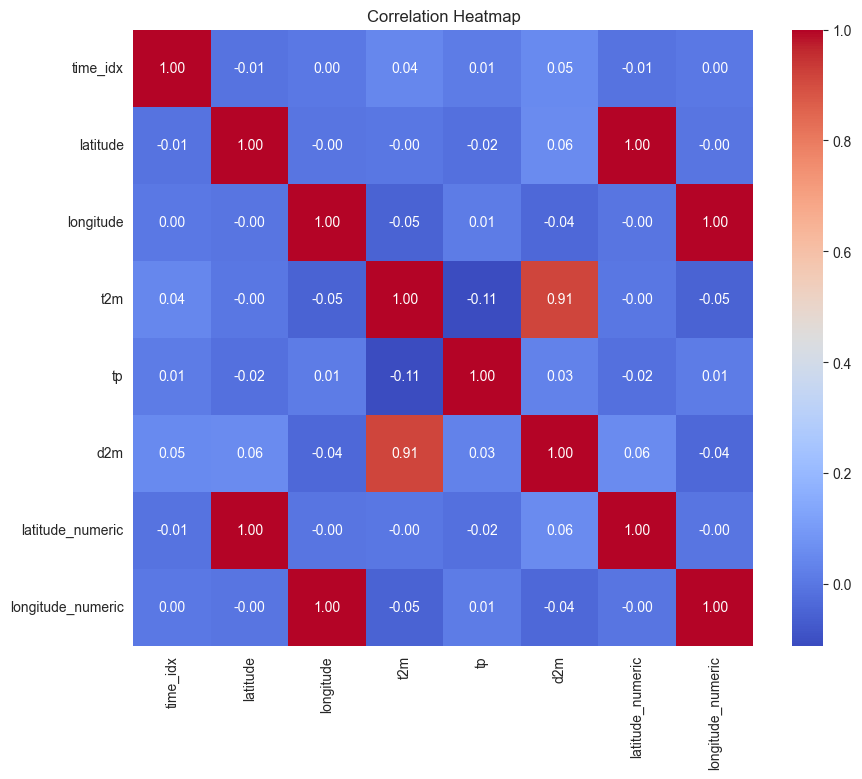

In [6]:
# Compute and display the correlation matrix for numeric variables
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Group ID Conversion and Geospatial Scatter Plot
 

Group ID Conversion Sample:
    group_id  latitude_numeric  longitude_numeric
0  55.0_14.0              55.0               14.0
1  50.8_14.0              50.8               14.0
2  50.8_14.2              50.8               14.2
3  50.8_14.5              50.8               14.5
4  50.8_14.8              50.8               14.8
5  50.8_15.0              50.8               15.0
6  50.8_15.2              50.8               15.2
7  51.0_14.0              51.0               14.0
8  51.0_14.5              51.0               14.5
9  51.0_14.8              51.0               14.8


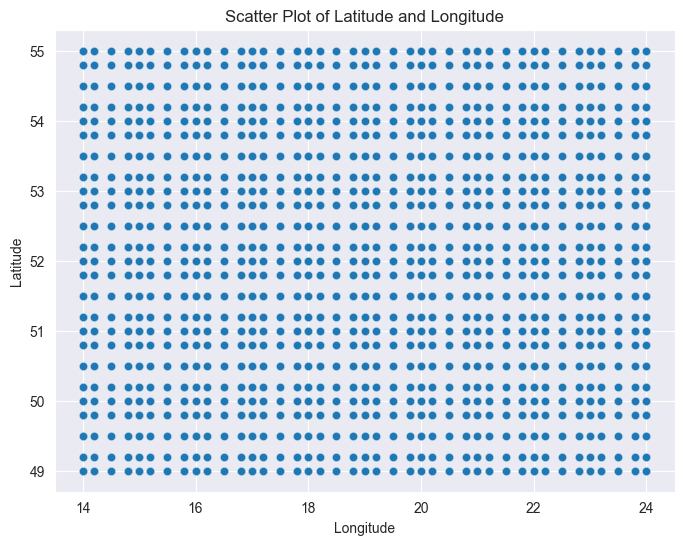

In [7]:
# Check conversion of group_id to numeric latitude and longitude
if 'latitude_numeric' in df.columns and 'longitude_numeric' in df.columns:
    print('Group ID Conversion Sample:')
    print(df[['group_id', 'latitude_numeric', 'longitude_numeric']].dropna().head(10))

    # Scatter plot of latitude and longitude
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='longitude_numeric', y='latitude_numeric', alpha=0.3)
    plt.title('Scatter Plot of Latitude and Longitude')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
else:
    print('Group ID numeric columns not found.')